# Code Modules & Helpful Functions

In [1]:
import warnings; warnings.filterwarnings("ignore")
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore",category=DataConversionWarning)
import numpy,pandas,pylab,seaborn,sympy,keras
pylab.style.use('seaborn-whitegrid')
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,median_absolute_error,r2_score
from sklearn.metrics import mean_absolute_error,explained_variance_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression,SGDRegressor,RANSACRegressor
from sklearn.linear_model import Ridge,RidgeCV,BayesianRidge
from sklearn.linear_model import HuberRegressor,TheilSenRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler
from keras.models import Sequential,Model
from keras.layers import Conv1D,Conv2D,MaxPooling1D,MaxPooling2D
from keras.layers import GlobalAveragePooling2D,GlobalMaxPooling2D
from keras.layers.advanced_activations import PReLU,LeakyReLU
from keras.layers import Input,Dense,LSTM,Activation,Flatten,Dropout

Using TensorFlow backend.


In [0]:
def display_cat(df,feature):
    print ('\n'+'<_>'*30); print ('\n'+feature+': '+str(len(set(df[feature]))))
    sympy.pprint(set(df[feature]))
def robust_scaler(Xtrain,ytrain,Xtest,ytest):
    scale_X=RobustScaler(); scale_y=RobustScaler()
    Xtrain=scale_X.fit_transform(Xtrain); Xtest=scale_X.transform(Xtest)
    ytrain=scale_y.fit_transform(ytrain.reshape(-1,1))
    ytest=scale_y.transform(ytest.reshape(-1,1))
    return Xtrain,ytrain,Xtest,ytest
def regression(regressor,X_train,X_test,y_train):
    regressor.fit(X_train,y_train)
    return regressor.predict(X_train),regressor.predict(X_test)
def scores(title,y_train,y_test,y_train_reg,y_test_reg):
    separator='-_-'*10; sympy.pprint(title); print('<_>'*38)
    print("EV score. Train: "+str(explained_variance_score(y_train,y_train_reg)))
    print("EV score. Test: "+str(explained_variance_score(y_test,y_test_reg)))
    print(separator)
    print("R2 score. Train: "+str(r2_score(y_train,y_train_reg)))
    print("R2 score. Test: "+str(r2_score(y_test,y_test_reg)))
    print(separator)
    print("MSE score. Train: "+str(mean_squared_error(y_train,y_train_reg)))
    print("MSE score. Test: "+str(mean_squared_error(y_test,y_test_reg)))
    print(separator)
    print("MAE score. Train: "+str(mean_absolute_error(y_train,y_train_reg)))
    print("MAE score. Test: "+str(mean_absolute_error(y_test,y_test_reg)))
    print(separator)
    print("MdAE score. Train: "+str(median_absolute_error(y_train,y_train_reg)))
    print("MdAE score. Test: "+str(median_absolute_error(y_test,y_test_reg))) 
def display_importance(regressor,X,y,title,n):
    importances=regressor.fit(X,y).feature_importances_
    indices=numpy.argsort(importances)[::-int(1)][:int(n)]
    pylab.figure(figsize=(12,4))
    pylab.xlabel("Feature Index"); pylab.ylabel("Feature Importance")
    pylab.bar(range(n),importances[indices],
              color="forestgreen",align="center",alpha=.5)
    pylab.xticks(range(n),indices); pylab.title(title); pylab.show()
def history_plot(fit_history):
    keys=list(fit_history.history.keys())[0:4]
    pylab.figure(figsize=(12,8)); pylab.subplot(211)
    pylab.plot(fit_history.history[keys[0]],color='slategray',label='train')
    pylab.plot(fit_history.history[keys[2]],color='#228B22',label='test')
    pylab.xlabel("Epochs"); pylab.ylabel("Loss")
    pylab.legend(); pylab.title('Loss Function')    
    pylab.subplot(212)
    pylab.plot(fit_history.history[keys[1]],
               color='slategray',label='train')
    pylab.plot(fit_history.history[keys[3]],
               color='#228B22',label='test')
    pylab.xlabel("Epochs"); pylab.ylabel("MAE"); pylab.legend()
    pylab.title('Mean Absolute Error'); pylab.show() 

# Loading and Displaying the Data

In [3]:
%%html
<div id="data">
  <iframe src="https://olgabelitskaya.github.io/data_dictionary.txt" 
  height="200" width="98%"></iframe>
</div>

In [4]:
path='https://raw.githubusercontent.com/OlgaBelitskaya/'+\
     'machine_learning_engineer_nd009/master/Machine_Learning_Engineer_ND_P6/'
macro=pandas.read_csv(path+'macro.csv')
train=pandas.read_csv(path+'train.csv'); test=pandas.read_csv(path+'test.csv')
n1,n2,n3,n4=int(100),int(107),int(1),int(15)
macro[n1:n2].T[n3:n4]

,100,101,102,103,104,105,106
oil_urals,82.87,82.87,82.87,82.87,82.87,82.87,82.87
gdp_quart,9995.8,9995.8,9995.8,9995.8,9995.8,9995.8,9995.8
gdp_quart_growth,4.1,4.1,4.1,4.1,4.1,4.1,4.1
cpi,319.8,319.8,319.8,319.8,319.8,319.8,319.8
ppi,350.2,350.2,350.2,350.2,350.2,350.2,350.2
gdp_deflator,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balance_trade,16.604,16.604,16.604,16.604,16.604,16.604,16.604
balance_trade_growth,14.1,14.1,14.1,14.1,14.1,14.1,14.1
usdrub,29.1525,29.0261,29.1,28.9194,29.0239,29.092,29.092
eurrub,39.2564,39.4051,39.5008,39.5233,39.3691,39.2524,39.2524


In [5]:
train[n1:n2].T[n3:n4]

,100,101,102,103,104,105,106
timestamp,2011-10-12,2011-10-12,2011-10-12,2011-10-13,2011-10-13,2011-10-13,2011-10-13
full_sq,41,37,44,38,26,34,52
life_sq,25,16,28,34,1,19,30
floor,5,9,4,3,6,9,1
max_floor,NaN,NaN,NaN,NaN,NaN,NaN,NaN
material,NaN,NaN,NaN,NaN,NaN,NaN,NaN
build_year,NaN,NaN,NaN,NaN,NaN,NaN,NaN
num_room,NaN,NaN,NaN,NaN,NaN,NaN,NaN
kitch_sq,NaN,NaN,NaN,NaN,NaN,NaN,NaN
state,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Selection of Features

In [0]:
X_list_num=['timestamp','full_sq','floor','max_floor','num_room','area_m',
            'kremlin_km','big_road2_km','big_road1_km','workplaces_km',
            'stadium_km','swim_pool_km','fitness_km','detention_facility_km',
            'cemetery_km','radiation_km','oil_chemistry_km',
            'theater_km','exhibition_km','museum_km','park_km',
            'public_healthcare_km','metro_min_walk','metro_km_avto', 
            'bus_terminal_avto_km','public_transport_station_min_walk',
            'railroad_station_walk_min','railroad_station_avto_km',
            'kindergarten_km','school_km','preschool_km','university_km',
            'additional_education_km','shopping_centers_km',
            'big_market_km','ekder_all','work_all','young_all']
X_list_cat=['sub_area','ID_metro','office_raion','sport_objects_raion',
            'raion_popul','healthcare_centers_raion',
            'school_education_centers_raion',
            'preschool_education_centers_raion']
target_train=train['price_doc']

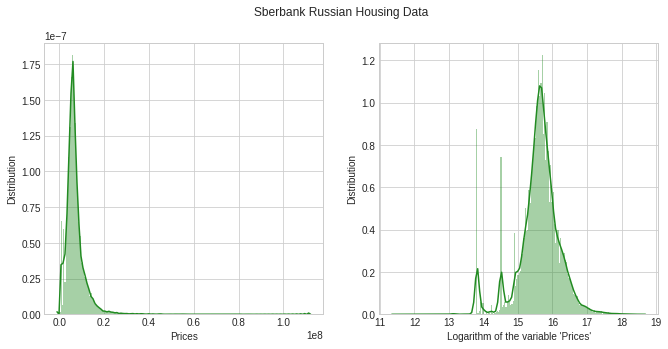

In [7]:
f,(ax1,ax2)=pylab.subplots(ncols=2,figsize=(11,5))
seaborn.distplot(target_train,bins=200,color='#228B22',ax=ax1)
ax1.set_xlabel("Prices"); ax1.set_ylabel("Distribution")
seaborn.distplot(numpy.log(target_train),bins=200,color='#228B22',ax=ax2)
ax2.set_xlabel("Logarithm of the variable 'Prices'")
ax2.set_ylabel("Distribution")
pylab.suptitle('Sberbank Russian Housing Data'); pylab.show()

In [8]:
print ("Sberbank Russian Housing Dataset Statistics: \n")
print ("Number of houses = "+str(len(target_train)))
print ("Number of features = "+str(len(list(train[X_list_num+X_list_cat].keys()))))
print ("Minimum house price = "+str(numpy.min(target_train)))
print ("Maximum house price = "+str(numpy.max(target_train)))
print ("Mean house price = %.4f"%numpy.mean(target_train))
print ("Median house price = %.4f" %numpy.median(target_train))
print ("Standard deviation of house prices = %.4f"%numpy.std(target_train))

Sberbank Russian Housing Dataset Statistics: 

Number of houses = 30471
Number of features = 46
Minimum house price = 100000
Maximum house price = 111111112
Mean house price = 7123035.2777
Median house price = 6274411.0000
Standard deviation of house prices = 4780032.8919


# Fill in Missing Values

In [9]:
pandas.DataFrame(train[X_list_num].isnull()\
.sum()[train[X_list_num].isnull().sum()!=0],columns=['nan'])

,nan
floor,167
max_floor,9572
num_room,9572
metro_min_walk,25
railroad_station_walk_min,25


In [10]:
pandas.DataFrame(test[X_list_num].isnull()\
.sum()[test[X_list_num].isnull().sum()!=0],columns=['nan'])

,nan
metro_min_walk,34
railroad_station_walk_min,34


In [11]:
df_train=pandas.DataFrame(train,columns=X_list_num)
df_train_cat=pandas.DataFrame(train,columns=X_list_num+X_list_cat)
df_test=pandas.DataFrame(test,columns=X_list_num)
df_test_cat=pandas.DataFrame(test,columns=X_list_num+X_list_cat)
df_train['prices']=target_train; df_train_cat['prices']=target_train
df_train=df_train.dropna(subset=['num_room'])
df_train_cat=df_train_cat.dropna(subset=['num_room'])
for el in ['metro_min_walk','railroad_station_walk_min','floor']:
    for df in [df_train,df_train_cat,df_test,df_test_cat]:
        df[el]=df[el].interpolate(method='linear')
len(df_train),len(df_test)

(20899, 7662)

In [0]:
#pandas.DataFrame(df_test[X_list_num].isnull().sum(),columns=['nan'])

# Categorical and Macro Features
## Add One Macro Feature

In [0]:
usdrub_pairs=dict(zip(list(macro['timestamp']),list(macro['usdrub'])))
# salary_pairs=dict(zip(list(macro['timestamp']),list(macro['salary'])))
for df in [df_train,df_train_cat,df_test,df_test_cat]:
    df['timestamp'].replace(usdrub_pairs,inplace=True)
    df.rename(columns={'timestamp':'usdrub'},inplace=True)

## Explore numbers of categories and values for categorical features

In [14]:
for feature in X_list_cat:
    display_cat(df_train_cat,feature)


<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>

sub_area: 146
set([Ajeroport, Akademicheskoe, Alekseevskoe, Altuf'evskoe, Arbat, Babushkinsk
oe, Basmannoe, Begovoe, Beskudnikovskoe, Bibirevo, Birjulevo Vostochnoe, Birju
levo Zapadnoe, Bogorodskoe, Brateevo, Butyrskoe, Caricyno, Cheremushki, Cherta
novo Central'noe, Chertanovo Juzhnoe, Chertanovo Severnoe, Danilovskoe, Dmitro
vskoe, Donskoe, Dorogomilovo, Filevskij Park, Fili Davydkovo, Gagarinskoe, Gol
'janovo, Golovinskoe, Hamovniki, Horoshevo-Mnevniki, Horoshevskoe, Hovrino, Iv
anovskoe, Izmajlovo, Jakimanka, Jaroslavskoe, Jasenevo, Juzhnoe Butovo, Juzhno
e Medvedkovo, Juzhnoe Tushino, Juzhnoportovoe, Kapotnja, Kon'kovo, Koptevo, Ko
sino-Uhtomskoe, Kotlovka, Krasnosel'skoe, Krjukovo, Krylatskoe, Kuncevo, Kurki
no, Kuz'minki, Lefortovo, Levoberezhnoe, Lianozovo, Ljublino, Lomonosovskoe, L
osinoostrovskoe, Mar'ina Roshha, Mar'ino, Marfino, Matushkino, Meshhanskoe, Me
trogorodok, Mitino, Molz

In [15]:
for feature in X_list_cat:
    display_cat(df_test_cat,feature)


<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>

sub_area: 145
set([Ajeroport, Akademicheskoe, Alekseevskoe, Altuf'evskoe, Arbat, Babushkinsk
oe, Basmannoe, Begovoe, Beskudnikovskoe, Bibirevo, Birjulevo Vostochnoe, Birju
levo Zapadnoe, Bogorodskoe, Brateevo, Butyrskoe, Caricyno, Cheremushki, Cherta
novo Central'noe, Chertanovo Juzhnoe, Chertanovo Severnoe, Danilovskoe, Dmitro
vskoe, Donskoe, Dorogomilovo, Filevskij Park, Fili Davydkovo, Gagarinskoe, Gol
'janovo, Golovinskoe, Hamovniki, Horoshevo-Mnevniki, Horoshevskoe, Hovrino, Iv
anovskoe, Izmajlovo, Jakimanka, Jaroslavskoe, Jasenevo, Juzhnoe Butovo, Juzhno
e Medvedkovo, Juzhnoe Tushino, Juzhnoportovoe, Kapotnja, Kon'kovo, Koptevo, Ko
sino-Uhtomskoe, Kotlovka, Krasnosel'skoe, Krjukovo, Krylatskoe, Kuncevo, Kurki
no, Kuz'minki, Lefortovo, Levoberezhnoe, Lianozovo, Ljublino, Lomonosovskoe, L
osinoostrovskoe, Mar'ina Roshha, Mar'ino, Marfino, Matushkino, Meshhanskoe, Me
trogorodok, Mitino, Molz

In [16]:
# Find the missing category in the testing set
for feature in X_list_cat:
    for element in list(set(df_test_cat[feature])):
        if element not in list(set(df_train_cat[feature])): 
            print (feature,element)

ID_metro 224


In [0]:
# Replace categorical values of 'ID_metro' by discrete numbers
ID_metro_cat=pandas.factorize(df_train_cat['ID_metro'])
ID_metro_pairs=dict(zip(list(ID_metro_cat[1]),list(set(ID_metro_cat[0]))))
ID_metro_pairs[224]=219
df_train_cat['ID_metro']=ID_metro_cat[0]
df_test_cat['ID_metro'].replace(ID_metro_pairs,inplace=True)

In [0]:
# Replace values of other categorical features by discrete numbers
for feature in X_list_cat:
    if feature!='ID_metro':
        feature_cat=pandas.factorize(df_train_cat[feature])
        feature_pairs=dict(zip(list(feature_cat[1]),list(set(feature_cat[0]))))
        df_train_cat[feature]=feature_cat[0]
        df_test_cat[feature].replace(feature_pairs,inplace=True)

In [19]:
for feature in X_list_cat:
    display_cat(df_train_cat,feature)


<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>

sub_area: 146
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4
0, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7
9, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114
, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 1
30, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145]
)

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>

ID_metro: 219
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 

In [20]:
for feature in X_list_cat:
    display_cat(df_test_cat,feature)


<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>

sub_area: 145
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4
0, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59,
 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 7
9, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98,
 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114
, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 1
30, 131, 132, 133, 134, 135, 137, 138, 139, 140, 141, 142, 143, 144, 145])

<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>

ID_metro: 212
set([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20,
 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 4


In [0]:
# Apply one hot encoding for the training set
encode=OneHotEncoder(sparse=False); df_train_cat1=df_train_cat.copy()
for column in X_list_cat:
    encode.fit(df_train_cat[[column]])
    transform=encode.transform(df_train_cat[[column]])    
    transform=pandas.DataFrame(transform,columns=[(column+"_"+str(i)) 
    for i in df_train_cat[column].value_counts().index])
    transform=transform.set_index(df_train_cat.index.values)    
    df_train_cat1=pandas.concat([df_train_cat1,transform],axis=int(1))
    df_train_cat1=df_train_cat1.drop(column,1)

In [0]:
# Apply one hot encoding for the testing set
encode=OneHotEncoder(sparse=False); df_test_cat1=df_test_cat.copy()
for column in X_list_cat:
    encode.fit(df_test_cat[[column]])
    transform=encode.transform(df_test_cat[[column]])    
    transform=pandas.DataFrame(transform,columns=[(column+"_"+str(i)) 
    for i in df_test_cat[column].value_counts().index])
    transform=transform.set_index(df_test_cat.index.values)    
    df_test_cat1=pandas.concat([df_test_cat1,transform],axis=int(1))
    df_test_cat1=df_test_cat1.drop(column,1)

In [23]:
# Check encoding
n1,n2,n3=int(625),int(638),int(3)
df_train_cat1.iloc[:,n1:n2][:n3].values

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [24]:
df_train_cat['preschool_education_centers_raion'][:n3]

7672    0
8056    1
8111    2
Name: preschool_education_centers_raion, dtype: int64

## Add Missing Columns with Zero Values

In [25]:
print('Shape of the train data frame:'+str(df_train_cat1.shape))
print('Shape of the test data frame:'+str(df_test_cat1.shape))
print("Features in the train data, but not in the test data:")
for element in list(df_train_cat1):
    if element not in list(df_test_cat1):
        print(element)
print("Features in the test data, but not in the train data:")
for element in list(df_test_cat1):
    if element not in list(df_train_cat1):
        print(element)

Shape of the train data frame:(20899, 638)
Shape of the test data frame:(7662, 628)
Features in the train data, but not in the test data:
prices
sub_area_136
ID_metro_188
ID_metro_205
ID_metro_216
ID_metro_214
ID_metro_183
ID_metro_179
ID_metro_153
ID_metro_217
raion_popul_136
Features in the test data, but not in the train data:
ID_metro_219


In [26]:
for column in ['sub_area_136','ID_metro_188','ID_metro_205',
               'ID_metro_216','ID_metro_214',
               'ID_metro_183','ID_metro_179','ID_metro_153',
               'ID_metro_217','raion_popul_136']:
    df_test_cat1[column]=0    
df_train_cat1['ID_metro_219']=0
print('Columns with zero values were added.\n')
print('Shape of the train data frame:'+str(df_train_cat1.shape))
print('Shape of the test data frame:'+str(df_test_cat1.shape))

Columns with zero values were added.

Shape of the train data frame:(20899, 639)
Shape of the test data frame:(7662, 638)


# Display Correlation

In [27]:
corr_with_prices=df_train.corr(method='pearson').iloc[-int(1)][:-int(1)]
pandas.DataFrame(corr_with_prices[abs(corr_with_prices).argsort()[::-int(1)]])

,prices
full_sq,0.593829
num_room,0.476337
kremlin_km,-0.290126
stadium_km,-0.238431
detention_facility_km,-0.233395
university_km,-0.222964
theater_km,-0.222873
workplaces_km,-0.220889
swim_pool_km,-0.220480
exhibition_km,-0.212144


In [28]:
features_list=corr_with_prices[abs(corr_with_prices)\
.argsort()[::-int(1)]][:int(10)].index.values.tolist()
print('The most correlated with prices:\n'); features_list

The most correlated with prices:



['full_sq',
 'num_room',
 'kremlin_km',
 'stadium_km',
 'detention_facility_km',
 'university_km',
 'theater_km',
 'workplaces_km',
 'swim_pool_km',
 'exhibition_km']

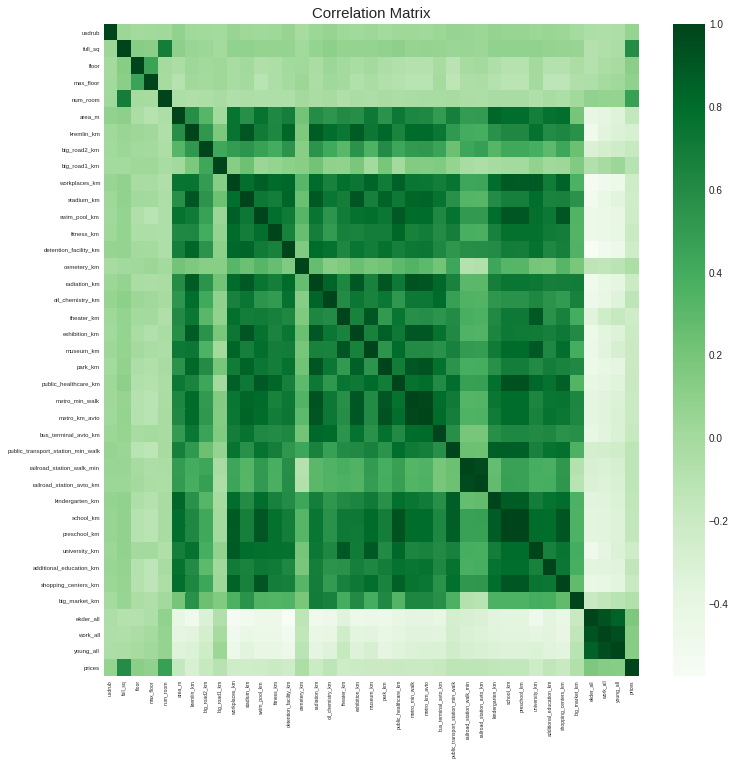

In [29]:
pylab.figure(figsize=(12,12)); cols=df_train.corr().columns.values
seaborn.heatmap(df_train.corr(),cmap=pylab.cm.Greens,
                xticklabels=cols,yticklabels=cols)
pylab.title("Correlation Matrix",fontsize=15)
pylab.xticks(fontsize=5); pylab.yticks(fontsize=6); pylab.show()

# Scale, Shuffle and Split the Data

In [0]:
target_train,features_train=\
df_train['prices'].values,df_train.drop('prices',int(1)).values
features_train_cat,features_train_cat_enc=\
df_train_cat.drop('prices',int(1)).values,\
df_train_cat1.drop('prices',int(1)).values
features_test,features_test_cat,features_test_cat_enc=\
df_test.values,df_test_cat.values,df_test_cat1.values

In [31]:
sympy.pprint('Numeric Features')
X_train,X_test,y_train,y_test=\
train_test_split(features_train,target_train,test_size=.2,random_state=1)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

Numeric Features


((16719, 38), (4180, 38), (16719,), (4180,))

In [32]:
sympy.pprint('Numeric and Categorical Features')
X_train_cat,X_test_cat,y_train_cat,y_test_cat=\
train_test_split(features_train_cat,target_train,test_size=.2,random_state=1)
X_train_cat.shape,X_test_cat.shape,y_train_cat.shape,y_test_cat.shape

Numeric and Categorical Features


((16719, 46), (4180, 46), (16719,), (4180,))

In [33]:
sympy.pprint('Numeric and Encoded Categorical Features')
X_train_cat_enc,X_test_cat_enc,y_train_cat_enc,y_test_cat_enc=\
train_test_split(features_train_cat_enc,target_train,test_size=.2,random_state=1)
X_train_cat_enc.shape,X_test_cat_enc.shape,\
y_train_cat_enc.shape,y_test_cat_enc.shape

Numeric and Encoded Categorical Features


((16719, 638), (4180, 638), (16719,), (4180,))

In [0]:
#for [Xtrain,ytrain,Xtest,ytest] in 
#[[X_train,y_train,X_test,y_test],
# [X_train_cat,y_train_cat,X_test_cat,y_test_cat],
# [X_train_cat_enc,y_train_cat_enc,X_test_cat_enc,y_test_cat_enc]]:
#    Xtrain,ytrain,Xtest,ytest=robust_scaler(Xtrain,ytrain,Xtest,ytest)

# Benchmark Models
## Ensemble Regressors. Scikit-Learn
Tuning Parameters

In [35]:
sympy.pprint('Numeric Features')
param_gbr={'max_depth':[3,4,5],'n_estimators':range(38,381,38)}
#gridsearch_gbr=GridSearchCV(GradientBoostingRegressor(),param_gbr).fit(X_train,y_train)
#gridsearch_gbr.best_params_

Numeric Features


In [36]:
sympy.pprint('Numeric and Categorical Features')
param_gbr_cat={'max_depth':[3,4,5],'n_estimators':range(46,461,46)}
#gridsearch_gbr_cat=\
#GridSearchCV(GradientBoostingRegressor(),param_gbr_cat)\
#.fit(X_train_cat,y_train_cat)
#gridsearch_gbr_cat.best_params_

Numeric and Categorical Features


In [37]:
sympy.pprint('Numeric Features and Encoded Categorical Features')
param_gbr_cat_enc={'max_depth':[3,4,5],'n_estimators':[160,319,638]}
#gridsearch_gbr_cat_enc=\
#GridSearchCV(GradientBoostingRegressor(),param_gbr_cat_enc)\
#.fit(X_train_cat_enc,y_train_cat_enc)
#gridsearch_gbr_cat_enc.best_params_

Numeric Features and Encoded Categorical Features


Fit Regressors

In [38]:
y_train_gbr,y_test_gbr=\
regression(GradientBoostingRegressor(max_depth=4,n_estimators=342),
           X_train,X_test,y_train)
scores('GradientBoostingRegressor. Numeric Features',
       y_train,y_test,y_train_gbr,y_test_gbr)

GradientBoostingRegressor. Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: 0.86392300538784
EV score. Test: 0.7359036561327138
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: 0.86392300538784
R2 score. Test: 0.7358555072890296
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 3207170259272.8545
MSE score. Test: 6849719534025.108
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 1119975.4077018318
MAE score. Test: 1412513.7857184685
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 626627.2225059979
MdAE score. Test: 718587.5714216367


In [39]:
GradientBoostingRegressor(max_depth=4,n_estimators=342)\
.get_params(deep=True)

{'alpha': 0.9,
 'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'ls',
 'max_depth': 4,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 342,
 'n_iter_no_change': None,
 'presort': 'deprecated',
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

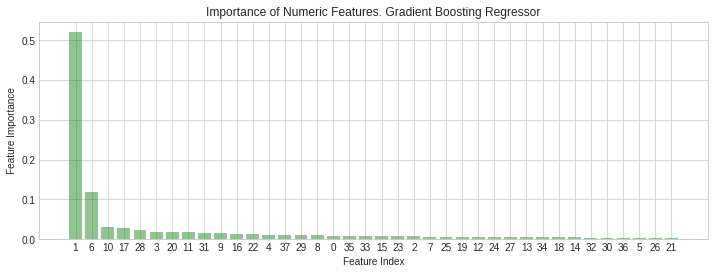

In [40]:
ti="Importance of Numeric Features. Gradient Boosting Regressor"
display_importance(GradientBoostingRegressor(max_depth=4,n_estimators=324),
                   X_train,y_train,ti,38)

In [41]:
y_train_cat_gbr,y_test_cat_gbr=\
regression(GradientBoostingRegressor(max_depth=4,n_estimators=308),
           X_train_cat,X_test_cat,y_train_cat)
ti='GradientBoostingRegressor. Numeric and Categorical Features'
scores(ti,y_train_cat,y_test_cat,y_train_cat_gbr,y_test_cat_gbr)

GradientBoostingRegressor. Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: 0.858186850618457
EV score. Test: 0.7251509766987229
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: 0.8581868506184569
R2 score. Test: 0.7250601251234843
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 3342364492738.88
MSE score. Test: 7129662300719.522
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 1139416.9881170364
MAE score. Test: 1407921.9144087713
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 638360.4218059555
MdAE score. Test: 728506.2709526587


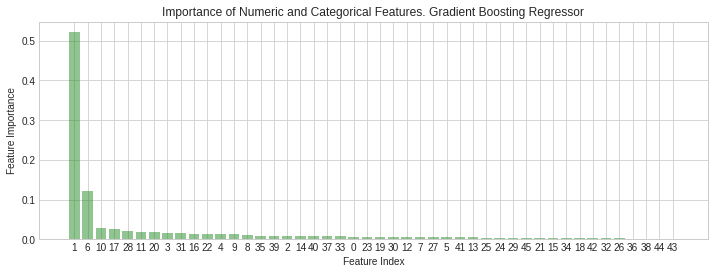

In [42]:
ti="Importance of Numeric and Categorical Features. Gradient Boosting Regressor"
display_importance(GradientBoostingRegressor(max_depth=4,n_estimators=308),
                   X_train_cat,y_train_cat,ti,46)

In [43]:
y_train_cat_enc_gbr,y_test_cat_enc_gbr=\
regression(GradientBoostingRegressor(max_depth=3,n_estimators=159),
           X_train_cat_enc,X_test_cat_enc,y_train_cat_enc)
scores('GradientBoostingRegressor. Numeric and Encoded Categorical Features',
       y_train_cat_enc,y_test_cat_enc,y_train_cat_enc_gbr,y_test_cat_enc_gbr)

GradientBoostingRegressor. Numeric and Encoded Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: 0.7749929775666035
EV score. Test: 0.7219368038543356
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: 0.7749929775666035
R2 score. Test: 0.7219074515896808
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 5303143507340.829
MSE score. Test: 7211416530259.816
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 1394277.6462952306
MAE score. Test: 1491970.8492268887
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 746254.783081173
MdAE score. Test: 789965.2245959938


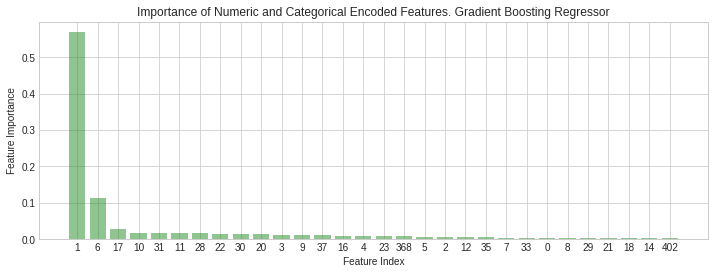

In [44]:
ti="Importance of Numeric and Categorical Encoded Features. "+\
   "Gradient Boosting Regressor"
display_importance(GradientBoostingRegressor(max_depth=3,n_estimators=159),
                   X_train_cat_enc,y_train_cat_enc,ti,30)

Fit Regressors with Dimensionality Reduction

In [45]:
pca=PCA(n_components=11).fit(X_train)
X_train_pca=pca.transform(X_train); X_test_pca=pca.transform(X_test)
y_train_gbr_pca,y_test_gbr_pca=\
regression(GradientBoostingRegressor(max_depth=4,n_estimators=38*8),
           X_train_pca,X_test_pca,y_train)
scores('GradientBoostingRegressor. Numeric Features (PCA)',
       y_train,y_test,y_train_gbr_pca,y_test_gbr_pca)

GradientBoostingRegressor. Numeric Features (PCA)
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: 0.8278686800608844
EV score. Test: 0.6943403355790576
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: 0.8278686800608844
R2 score. Test: 0.694010101902232
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 4056927121087.224
MSE score. Test: 7934842633679.43
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 1246086.2518887992
MAE score. Test: 1512978.3156448386
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 675073.0664029252
MdAE score. Test: 771361.5220128421


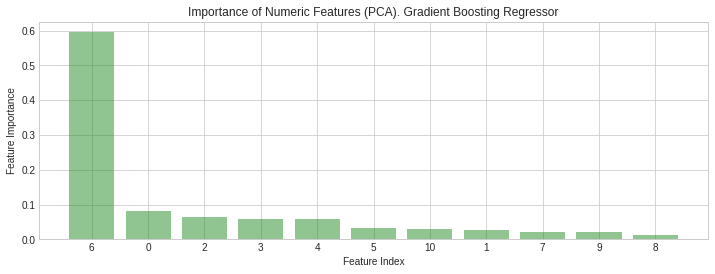

In [46]:
ti="Importance of Numeric Features (PCA). Gradient Boosting Regressor"
display_importance(GradientBoostingRegressor(max_depth=4,n_estimators=38*8),
                   X_train_pca,y_train,ti,11)

In [47]:
pca_cat=PCA(n_components=13).fit(X_train_cat)
X_train_cat_pca=pca_cat.transform(X_train_cat)
X_test_cat_pca=pca_cat.transform(X_test_cat)
y_train_cat_gbr_pca,y_test_cat_gbr_pca=\
regression(GradientBoostingRegressor(max_depth=4,n_estimators=32*8),
           X_train_cat_pca,X_test_cat_pca,y_train_cat)
scores('GradientBoostingRegressor. Numeric and Categorical Features (PCA)',
       y_train_cat,y_test_cat,y_train_cat_gbr_pca,y_test_cat_gbr_pca)

GradientBoostingRegressor. Numeric and Categorical Features (PCA)
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: 0.8197511376649796
EV score. Test: 0.695100935932045
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: 0.8197511376649796
R2 score. Test: 0.6948561644399361
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 4248247782046.3687
MSE score. Test: 7912902781623.306
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 1272160.340338533
MAE score. Test: 1517783.6236296152
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 673833.2813912807
MdAE score. Test: 766999.322257678


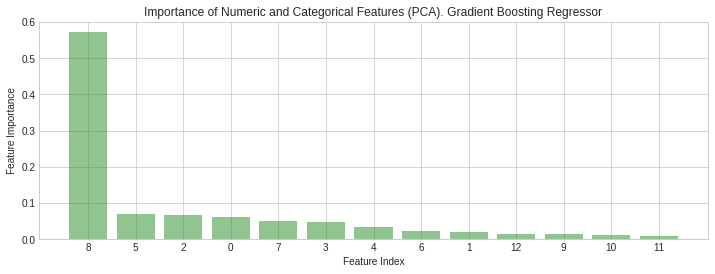

In [48]:
ti="Importance of Numeric and Categorical Features (PCA). Gradient Boosting Regressor"
display_importance(GradientBoostingRegressor(max_depth=4,n_estimators=32*8),
                   X_train_cat_pca,y_train_cat,ti,13)

In [49]:
pca_cat_enc=PCA(n_components=18).fit(X_train_cat_enc)
X_train_cat_enc_pca=pca_cat_enc.transform(X_train_cat_enc)
X_test_cat_enc_pca=pca_cat_enc.transform(X_test_cat_enc)
y_train_cat_enc_gbr_pca,y_test_cat_enc_gbr_pca=\
regression(GradientBoostingRegressor(max_depth=4,n_estimators=32*8),
           X_train_cat_enc_pca,X_test_cat_enc_pca,y_train_cat_enc)
scores('GradientBoostingRegressor. Numeric and Categorical Features (PCA)',
       y_train_cat_enc,y_test_cat_enc,
       y_train_cat_enc_gbr_pca,y_test_cat_enc_gbr_pca)

GradientBoostingRegressor. Numeric and Categorical Features (PCA)
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: 0.8246992262292503
EV score. Test: 0.6952556863334991
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: 0.8246992262292503
R2 score. Test: 0.6951431428206214
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 4131627316340.118
MSE score. Test: 7905460940228.664
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 1258748.6827158777
MAE score. Test: 1517579.5263824689
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 686839.3962816866
MdAE score. Test: 790185.7123067607


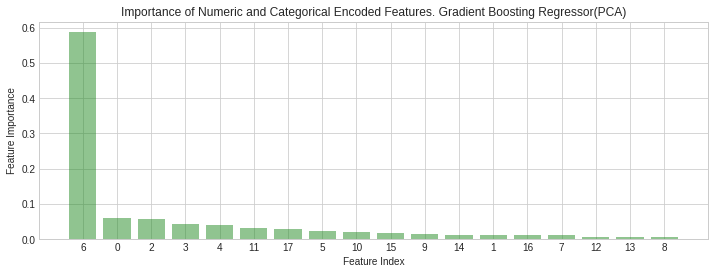

In [50]:
ti="Importance of Numeric and Categorical Encoded Features. Gradient Boosting Regressor(PCA)"
display_importance(GradientBoostingRegressor(max_depth=4,n_estimators=32*8),
                   X_train_cat_enc_pca,y_train_cat_enc,ti,18)

## MLP Regressors. Scikit-Learn
Fit Regressors

In [0]:
mlpr=MLPRegressor(hidden_layer_sizes=(32*8,),max_iter=500,
                  solver='adam',batch_size=12,
                  learning_rate='adaptive',verbose='True')
mlpr.fit(X_train,y_train)

Iteration 1, loss = 25645619505846.47265625
Iteration 2, loss = 16861405376252.14453125
Iteration 3, loss = 16469958337836.56640625
Iteration 4, loss = 16463840292700.51171875
Iteration 5, loss = 16408944995253.06445312
Iteration 6, loss = 16382588726752.28125000
Iteration 7, loss = 16347785428333.27929688
Iteration 8, loss = 16410663528016.56835938
Iteration 9, loss = 16295016032248.76562500
Iteration 10, loss = 16273942939991.01757812
Iteration 11, loss = 16223134598656.62109375
Iteration 12, loss = 16214942150612.92187500
Iteration 13, loss = 16174082809962.41015625
Iteration 14, loss = 16221627754160.41406250
Iteration 15, loss = 16123300197374.87109375
Iteration 16, loss = 16100772865004.57226562
Iteration 17, loss = 16189178792677.56054688
Iteration 18, loss = 16144478144402.66210938
Iteration 19, loss = 16077687722977.67187500
Iteration 20, loss = 16028797855736.47460938
Iteration 21, loss = 15961387870432.43750000
Iteration 22, loss = 15975224697007.12500000
Iteration 23, loss 

MLPRegressor(activation='relu', alpha=0.0001, batch_size=12, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(256,), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose='True',
             warm_start=False)

In [0]:
y_train_mlpr=mlpr.predict(X_train)
y_test_mlpr=mlpr.predict(X_test)
scores('MLP Regressor. Numeric Features',
       y_train,y_test,y_train_mlpr,y_test_mlpr)

MLP Regressor. Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: 0.11656479094075334
EV score. Test: 0.13067448089350608
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: 0.11638422441678242
R2 score. Test: 0.1306713811711634
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 20825755625716.7
MSE score. Test: 22543181426063.633
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 2993162.563964243
MAE score. Test: 2989145.641359027
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 2215735.6182560194
MdAE score. Test: 2155860.504958892


In [0]:
mlpr_cat=MLPRegressor(hidden_layer_sizes=(32*8,),max_iter=500,
                      solver='adam',batch_size=12,
                      learning_rate='adaptive',verbose='True')
mlpr_cat.fit(X_train_cat,y_train_cat)

Iteration 1, loss = 26609150625301.71093750
Iteration 2, loss = 17288965550141.71484375
Iteration 3, loss = 16455016561706.38281250
Iteration 4, loss = 16466591754077.31835938
Iteration 5, loss = 16301532994760.91406250
Iteration 6, loss = 16295638014566.93359375
Iteration 7, loss = 16284372974521.96875000
Iteration 8, loss = 16327346013409.46289062
Iteration 9, loss = 16375319894008.58789062
Iteration 10, loss = 16198446457351.08789062
Iteration 11, loss = 16124309516397.43750000
Iteration 12, loss = 16169119134855.94726562
Iteration 13, loss = 16184264074672.75000000
Iteration 14, loss = 16114314894616.26757812
Iteration 15, loss = 16076488606789.87890625
Iteration 16, loss = 16071312560926.99218750
Iteration 17, loss = 16052095802274.78320312
Iteration 18, loss = 16003669384146.21484375
Iteration 19, loss = 16012687895924.54882812
Iteration 20, loss = 15972379163729.33593750
Iteration 21, loss = 15996348040522.05273438
Iteration 22, loss = 15985848961190.59570312
Iteration 23, loss 

MLPRegressor(activation='relu', alpha=0.0001, batch_size=12, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(256,), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose='True',
             warm_start=False)

In [0]:
y_train_cat_mlpr=mlpr_cat.predict(X_train_cat)
y_test_cat_mlpr=mlpr_cat.predict(X_test_cat)
scores('MLP Regressor. Numeric and Categorical Features',
       y_train_cat,y_test_cat,y_train_cat_mlpr,y_test_cat_mlpr)

MLP Regressor. Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: 0.11694528268713511
EV score. Test: 0.11749064635457807
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: 0.11356825909046542
R2 score. Test: 0.11321430633180751
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 20892124524232.19
MSE score. Test: 22995873304311.176
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 2811846.6327313934
MAE score. Test: 2880182.075509605
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 1923571.3304697722
MdAE score. Test: 1984619.2762974151


In [0]:
mlpr_cat_enc=MLPRegressor(hidden_layer_sizes=(32*8,),max_iter=500,
                          solver='adam',batch_size=12,
                          learning_rate='adaptive',verbose='True')
mlpr_cat_enc.fit(X_train_cat_enc,y_train_cat_enc) 

Iteration 1, loss = 26098717127048.84375000
Iteration 2, loss = 16917483688993.57226562
Iteration 3, loss = 16428897667153.58398438
Iteration 4, loss = 16406877229832.70117188
Iteration 5, loss = 16385870850983.72070312
Iteration 6, loss = 16277433199273.53710938
Iteration 7, loss = 16384196049692.51757812
Iteration 8, loss = 16350039655830.11523438
Iteration 9, loss = 16192404762706.49804688
Iteration 10, loss = 16205640240667.81445312
Iteration 11, loss = 16188417446223.61132812
Iteration 12, loss = 16160494614118.30859375
Iteration 13, loss = 16251991808808.50000000
Iteration 14, loss = 16112083152024.93750000
Iteration 15, loss = 16207903033447.95507812
Iteration 16, loss = 16043461294602.80664062
Iteration 17, loss = 16151983000292.91406250
Iteration 18, loss = 16095814744758.89453125
Iteration 19, loss = 16071216700518.12695312
Iteration 20, loss = 15982703223138.83593750
Iteration 21, loss = 15975075068327.83007812
Iteration 22, loss = 15963212536040.65429688
Iteration 23, loss 

In [0]:
y_train_cat_enc_mlpr=mlpr_cat_enc.predict(X_train_cat_enc)
y_test_cat_enc_mlpr=mlpr_cat_enc.predict(X_test_cat_enc)
scores('MLP Regressor. Numeric and Categorical Encoded Features',
       y_train_cat_enc,y_test_cat_enc,y_train_cat_enc_mlpr,y_test_cat_enc_mlpr)

Fit Regressors with Dimensionality Reduction

In [0]:
mlpr_pca=MLPRegressor(hidden_layer_sizes=(32*8,),
                      max_iter=500,solver='adam',batch_size=14,
                      learning_rate='adaptive',verbose='True')
mlpr_pca.fit(X_train_pca,y_train)

Iteration 1, loss = 17875434498593.01171875
Iteration 2, loss = 17264425229261.89843750
Iteration 3, loss = 16589514366731.56640625
Iteration 4, loss = 15783074760254.73242188
Iteration 5, loss = 14791720618866.23632812
Iteration 6, loss = 14318214653764.92382812
Iteration 7, loss = 14157381342109.66796875
Iteration 8, loss = 14135674524594.60742188
Iteration 9, loss = 14081572530827.06054688
Iteration 10, loss = 14048905159379.59179688
Iteration 11, loss = 14006752709720.90429688
Iteration 12, loss = 13943786298380.85937500
Iteration 13, loss = 13906136142251.08398438
Iteration 14, loss = 13881154724181.02343750
Iteration 15, loss = 13904839528643.46093750
Iteration 16, loss = 13850770132234.86914062
Iteration 17, loss = 13847722907276.07617188
Iteration 18, loss = 13802738544728.24023438
Iteration 19, loss = 13786629839498.38476562
Iteration 20, loss = 13776145086406.74218750
Iteration 21, loss = 13806717282521.16992188
Iteration 22, loss = 13744879517350.34765625
Iteration 23, loss 

MLPRegressor(activation='relu', alpha=0.0001, batch_size=12, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(256,), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose='True',
             warm_start=False)

In [0]:
y_train_mlpr_pca=mlpr_pca.predict(X_train_pca); y_test_mlpr_pca=mlpr_pca.predict(X_test_pca)
scores('MLP Regressor. Numeric Features (PCA)',y_train,y_test,y_train_mlpr_pca,y_test_mlpr_pca)

MLP Regressor. Numeric Features (PCA)
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: -0.06870930780465723
EV score. Test: -0.054216184750778496
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: -0.08651843131094705
R2 score. Test: -0.0682445323442773
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 25607925931815.613
MSE score. Test: 27701412076460.133
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 3358368.4905898757
MAE score. Test: 3439177.237139656
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 2509646.5391837824
MdAE score. Test: 2545169.1094358442


In [0]:
mlpr_cat_pca=MLPRegressor(hidden_layer_sizes=(32*8,),max_iter=100,solver='adam',
                          batch_size=12,learning_rate='adaptive',verbose='True')
mlpr_cat_pca.fit(X_train_cat_pca,y_train_cat)

Iteration 1, loss = 18025239641053.61328125
Iteration 2, loss = 17262700041305.93750000
Iteration 3, loss = 16585440896142.86914062
Iteration 4, loss = 15820382329212.91210938
Iteration 5, loss = 14637875998739.95898438
Iteration 6, loss = 14265154381802.05078125
Iteration 7, loss = 14286827413270.31835938
Iteration 8, loss = 14142752743383.07226562
Iteration 9, loss = 14131844474546.17773438
Iteration 10, loss = 14002618380747.34375000
Iteration 11, loss = 14005664926695.17187500
Iteration 12, loss = 13988120947925.14257812
Iteration 13, loss = 13947480626782.60546875
Iteration 14, loss = 13886188190090.20898438
Iteration 15, loss = 13893492391123.72656250
Iteration 16, loss = 13835370287224.94335938
Iteration 17, loss = 13778570220398.96289062
Iteration 18, loss = 13801404872021.89843750
Iteration 19, loss = 13777547765359.06445312
Iteration 20, loss = 13741962640025.61132812
Iteration 21, loss = 13717495064467.31445312
Iteration 22, loss = 13692410517559.68359375
Iteration 23, loss 

MLPRegressor(activation='relu', alpha=0.0001, batch_size=12, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(256,), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose='True',
             warm_start=False)

In [0]:
y_train_cat_mlpr_pca=mlpr_cat_pca.predict(X_train_cat_pca)
y_test_cat_mlpr_pca=mlpr_cat_pca.predict(X_test_cat_pca)
scores('MLP Regressor. Numeric and Categorical Features (PCA)',
       y_train_cat,y_test_cat,y_train_cat_mlpr_pca,y_test_cat_mlpr_pca)

MLP Regressor. Numeric and Categorical Features (PCA)
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: -0.018441320892771396
EV score. Test: -0.013400953218172251
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: -0.018902980431408478
R2 score. Test: -0.014418790907228418
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 24014311495031.137
MSE score. Test: 26305618324446.67
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 3087471.7951862235
MAE score. Test: 3171958.354232685
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 2135644.9352294095
MdAE score. Test: 2194406.008007454


In [0]:
mlpr_cat_enc_pca=MLPRegressor(hidden_layer_sizes=(32*8,),max_iter=100,solver='adam',
                              batch_size=12,learning_rate='adaptive',verbose='True')
mlpr_cat_enc_pca.fit(X_train_cat_enc_pca,y_train_cat_enc)

Iteration 1, loss = 17880499613639.60546875
Iteration 2, loss = 17305408552439.51367188
Iteration 3, loss = 16678011870918.64648438
Iteration 4, loss = 16026439099194.22656250
Iteration 5, loss = 15137699316083.01367188
Iteration 6, loss = 14419802429865.47265625
Iteration 7, loss = 14196464518727.17187500
Iteration 8, loss = 14092779510828.52539062
Iteration 9, loss = 14064308290459.28125000
Iteration 10, loss = 14144850185606.69726562
Iteration 11, loss = 14034507498733.01367188
Iteration 12, loss = 13992687242346.21875000
Iteration 13, loss = 13988529502954.85937500
Iteration 14, loss = 13952636197670.61914062
Iteration 15, loss = 13948617082254.22851562
Iteration 16, loss = 13879103586862.74414062
Iteration 17, loss = 13957715927203.23437500
Iteration 18, loss = 13909452949204.42382812
Iteration 19, loss = 13869971989801.47460938
Iteration 20, loss = 13827032445813.55273438
Iteration 21, loss = 13822672324807.64257812
Iteration 22, loss = 13760159594473.75585938
Iteration 23, loss 

MLPRegressor(activation='relu', alpha=0.0001, batch_size=12, beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(256,), learning_rate='adaptive',
             learning_rate_init=0.001, max_fun=15000, max_iter=100,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose='True',
             warm_start=False)

In [0]:
y_train_cat_enc_mlpr_pca=mlpr_cat_enc_pca.predict(X_train_cat_enc_pca)
y_test_cat_enc_mlpr_pca=mlpr_cat_enc_pca.predict(X_test_cat_enc_pca)
scores('MLP Regressor. Numeric and Encoded Categorical Features (PCA)',
       y_train_cat,y_test_cat,y_train_cat_mlpr_pca,y_test_cat_mlpr_pca)

MLP Regressor. Numeric and Encoded Categorical Features (PCA)
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: -0.018441320892771396
EV score. Test: -0.013400953218172251
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: -0.018902980431408478
R2 score. Test: -0.014418790907228418
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 24014311495031.137
MSE score. Test: 26305618324446.67
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 3087471.7951862235
MAE score. Test: 3171958.354232685
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 2135644.9352294095
MdAE score. Test: 2194406.008007454


## Neural Networks. Keras
MLP

In [51]:
def mlp_model():
    model=Sequential()
    model.add(Dense(32*32,activation='relu',input_dim=38))
    model.add(Dense(32*4,activation='relu'))
    model.add(Dense(32,activation='relu'))
    model.add(Dense(1,kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='nadam',metrics=['mae'])
    return model
mlp_model=mlp_model()
checkpointer=keras.callbacks.ModelCheckpoint(filepath='weights.best.model.hdf5',
                                             save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                               verbose=2,patience=5,factor=0.95)
mlp_history=mlp_model.fit(X_train,y_train,validation_data=(X_test,y_test),
                          nb_epoch=600,batch_size=12,verbose=2,
                          callbacks=[checkpointer,lr_reduction])

Train on 16719 samples, validate on 4180 samples
Epoch 1/600
 - 7s - loss: 41994625868136.1328 - mae: 4466514.0000 - val_loss: 36176540611191.0547 - val_mae: 3828988.0000
Epoch 2/600
 - 5s - loss: 34002836647845.5977 - mae: 3900841.5000 - val_loss: 35658286049262.3594 - val_mae: 3836866.7500
Epoch 3/600
 - 5s - loss: 33320918937938.8242 - mae: 3856530.0000 - val_loss: 34862806475465.3711 - val_mae: 3758216.7500
Epoch 4/600
 - 5s - loss: 33169685759371.9688 - mae: 3834606.5000 - val_loss: 34676366020745.1875 - val_mae: 3798953.5000
Epoch 5/600
 - 5s - loss: 33249266555935.7852 - mae: 3851280.7500 - val_loss: 34919217015299.4258 - val_mae: 3851279.5000
Epoch 6/600
 - 5s - loss: 33071393785116.2500 - mae: 3835499.0000 - val_loss: 34754247280771.3086 - val_mae: 3782563.2500
Epoch 7/600
 - 4s - loss: 32774667450931.3555 - mae: 3814427.0000 - val_loss: 35354228806380.6484 - val_mae: 3871104.0000
Epoch 8/600
 - 5s - loss: 32738998705319.0234 - mae: 3819652.7500 - val_loss: 37110466479835.9922

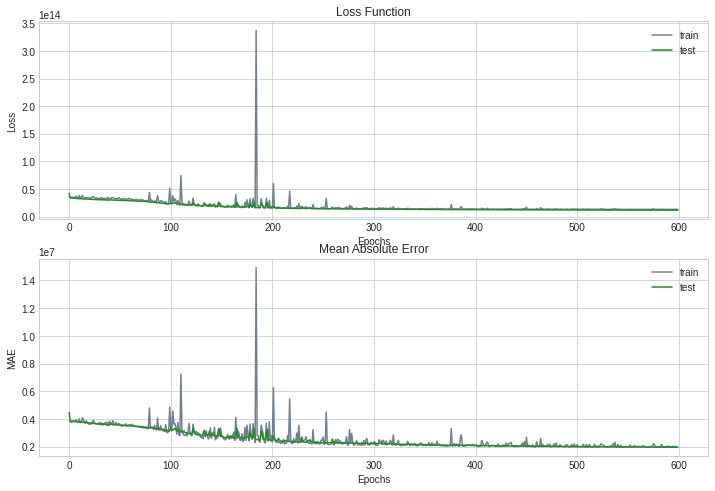

In [52]:
history_plot(mlp_history)

In [53]:
mlp_model.load_weights('weights.best.model.hdf5')
y_train_mlp=mlp_model.predict(X_train); y_test_mlp=mlp_model.predict(X_test)
scores('MLP Initial Model. Numeric Features',
       y_train,y_test,y_train_mlp,y_test_mlp)

MLP Initial Model. Numeric Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: 0.5141960863975319
EV score. Test: 0.5048201485513069
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: 0.5127125687280989
R2 score. Test: 0.5042585615169493
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 11484775672382.842
MSE score. Test: 12855425377801.297
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 1922720.273799644
MAE score. Test: 1969012.4722787081
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 1027141.0
MdAE score. Test: 1045921.0


In [54]:
def mlp_cat_model():
    model = Sequential()    
    model.add(Dense(32*32,activation='relu',input_dim=46))
    model.add(Dense(32*4,activation='relu'))   
    model.add(Dense(1,kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='nadam',metrics=['mae'])
    return model
mlp_cat_model=mlp_cat_model()
checkpointer=keras.callbacks.ModelCheckpoint(filepath='weights.best.model.hdf5',
                                             save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                               verbose=2,patience=5,factor=0.95)
mlp_cat_history=mlp_cat_model.fit(X_train_cat,y_train_cat,
                                  validation_data=(X_test_cat,y_test_cat),
                                  nb_epoch=600,batch_size=12,verbose=2,
                                  callbacks=[checkpointer,lr_reduction])

Train on 16719 samples, validate on 4180 samples
Epoch 1/600
 - 4s - loss: 42740894481558.8594 - mae: 4513608.0000 - val_loss: 36571179125447.4141 - val_mae: 3905720.0000
Epoch 2/600
 - 4s - loss: 33499895936664.2305 - mae: 3860075.7500 - val_loss: 37338331374202.9766 - val_mae: 3981513.7500
Epoch 3/600
 - 4s - loss: 33233409329623.4844 - mae: 3841403.5000 - val_loss: 36189188084868.2891 - val_mae: 3967592.0000
Epoch 4/600
 - 4s - loss: 33281996756868.8906 - mae: 3847569.0000 - val_loss: 34665486718633.0352 - val_mae: 3820722.7500
Epoch 5/600
 - 4s - loss: 32914408850386.9844 - mae: 3822043.0000 - val_loss: 34241477191254.7227 - val_mae: 3741925.2500
Epoch 6/600
 - 5s - loss: 32816310752292.5664 - mae: 3824655.0000 - val_loss: 34760934575214.7305 - val_mae: 3878565.0000
Epoch 7/600
 - 5s - loss: 32770504551152.2422 - mae: 3825491.7500 - val_loss: 34601584561090.2656 - val_mae: 3836645.2500
Epoch 8/600
 - 4s - loss: 32683319006562.0742 - mae: 3820165.5000 - val_loss: 34555529884263.3789

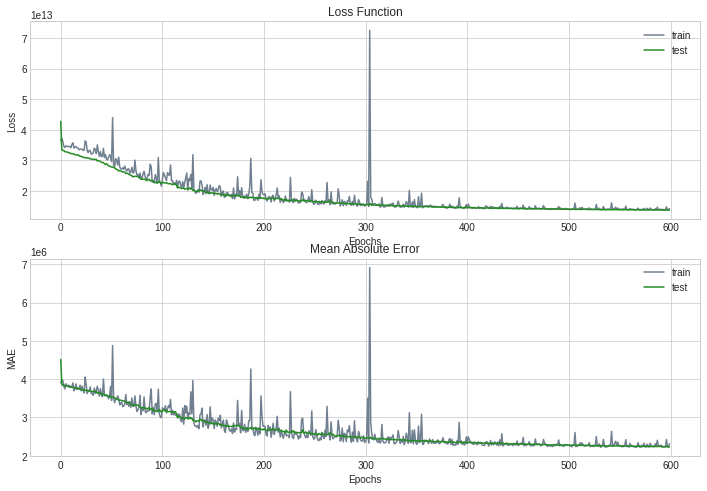

In [55]:
history_plot(mlp_cat_history)

In [56]:
mlp_cat_model.load_weights('weights.best.model.hdf5')
y_train_cat_mlp=mlp_cat_model.predict(X_train_cat)
y_test_cat_mlp=mlp_cat_model.predict(X_test_cat)
scores('MLP Initial Model. Numeric and Categorical Features',
       y_train_cat,y_test_cat,y_train_cat_mlp,y_test_cat_mlp)

MLP Initial Model. Numeric and Categorical Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: 0.4173692460422247
EV score. Test: 0.46563047094091436
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: 0.41733236915933425
R2 score. Test: 0.4655825030939209
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 13732771670915.25
MSE score. Test: 13858361877292.096
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 2223426.435784138
MAE score. Test: 2229925.1534688994
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 1371935.0
MdAE score. Test: 1376940.625


In [57]:
def mlp_cat_enc_model():
    model=Sequential()
    model.add(Dense(32*32,activation='relu',input_dim=638))    
    model.add(Dense(1,kernel_initializer='normal'))    
    model.compile(loss='mse',optimizer='rmsprop',metrics=['mae'])
    return model
mlp_cat_enc_model=mlp_cat_enc_model()
checkpointer=keras.callbacks.ModelCheckpoint(filepath='weights.best.model.hdf5',
                                             save_best_only=True)
lr_reduction=keras.callbacks.ReduceLROnPlateau(monitor='val_loss',
                                               verbose=2,patience=5,factor=0.9)
mlp_cat_enc_history=mlp_cat_enc_model.fit(X_train_cat_enc,y_train_cat_enc,
                                          validation_data=(X_test_cat_enc,y_test_cat_enc),
                                          nb_epoch=1000,batch_size=16,verbose=2,
                                          callbacks=[checkpointer,lr_reduction])

Train on 16719 samples, validate on 4180 samples
Epoch 1/1000
 - 2s - loss: 48592452874684.6562 - mae: 4932058.0000 - val_loss: 36913937612204.2188 - val_mae: 3947564.7500
Epoch 2/1000
 - 3s - loss: 34276349872966.9727 - mae: 3896621.7500 - val_loss: 40948271208841.9219 - val_mae: 4152033.7500
Epoch 3/1000
 - 3s - loss: 33741428120002.1719 - mae: 3877357.5000 - val_loss: 35305693044461.6250 - val_mae: 3794959.5000
Epoch 4/1000
 - 2s - loss: 33510808874572.6523 - mae: 3855572.0000 - val_loss: 34906081001785.5703 - val_mae: 3806048.5000
Epoch 5/1000
 - 2s - loss: 33406358118548.4648 - mae: 3855269.7500 - val_loss: 37285670411198.3438 - val_mae: 4072025.0000
Epoch 6/1000
 - 2s - loss: 33174286891511.5781 - mae: 3836098.2500 - val_loss: 34861719169884.3555 - val_mae: 3780326.0000
Epoch 7/1000
 - 2s - loss: 33113866505029.0117 - mae: 3832597.5000 - val_loss: 37036262326993.2109 - val_mae: 4108910.0000
Epoch 8/1000
 - 3s - loss: 32948728545808.1992 - mae: 3821938.2500 - val_loss: 34470172706

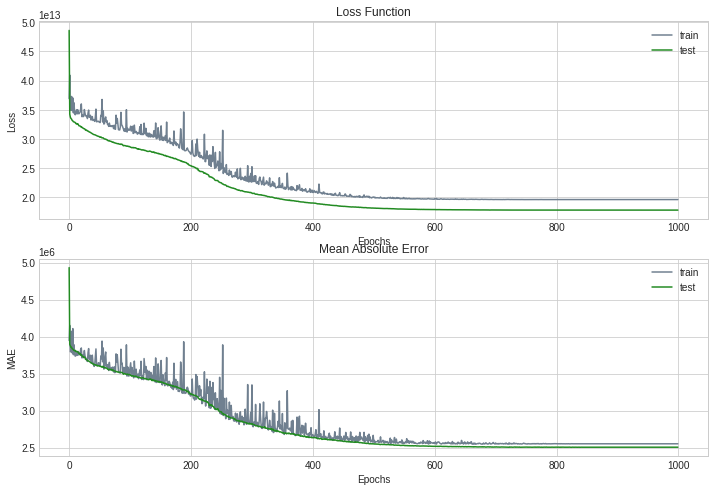

In [58]:
history_plot(mlp_cat_enc_history)

In [59]:
mlp_cat_enc_model.load_weights('weights.best.model.hdf5')
y_train_cat_enc_mlp=mlp_cat_enc_model.predict(X_train_cat_enc)
y_test_cat_enc_mlp=mlp_cat_enc_model.predict(X_test_cat_enc)
scores('MLP Initial Model. Numeric and Categorical Encoded Features',
       y_train_cat_enc,y_test_cat_enc,y_train_cat_enc_mlp,y_test_cat_enc_mlp)

MLP Initial Model. Numeric and Categorical Encoded Features
<_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_><_>
EV score. Train: 0.24320429925481313
EV score. Test: 0.24315861636701075
-_--_--_--_--_--_--_--_--_--_-
R2 score. Train: 0.2431873349684861
R2 score. Test: 0.24311228525278794
-_--_--_--_--_--_--_--_--_--_-
MSE score. Train: 17837159602532.848
MSE score. Test: 19627396019346.504
-_--_--_--_--_--_--_--_--_--_-
MAE score. Train: 2514908.0869818768
MAE score. Test: 2559273.2182117226
-_--_--_--_--_--_--_--_--_--_-
MdAE score. Train: 1527223.0
MdAE score. Test: 1541631.25


# Display Predictions

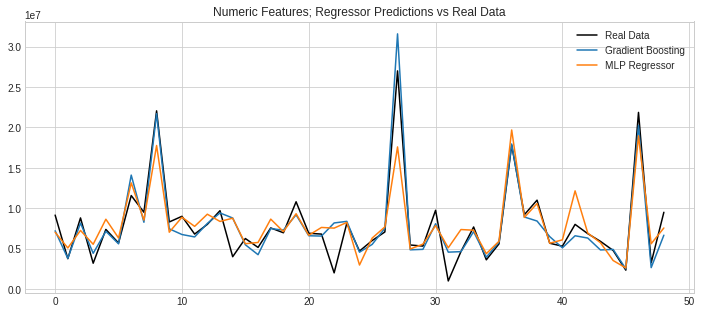

In [60]:
n=int(50); pylab.figure(figsize=(12,5))
pylab.plot(y_test[1:n],color='black',label='Real Data')
pylab.plot(y_test_gbr[1:n],label='Gradient Boosting')
pylab.plot(y_test_mlp[1:n],label='MLP Regressor')
pylab.legend(); pylab.title("Numeric Features; "+\
                            "Regressor Predictions vs Real Data"); pylab.show()

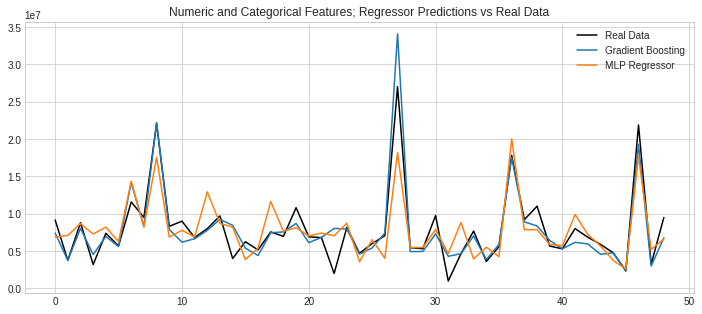

In [62]:
n=int(50); pylab.figure(figsize=(12,5)); pylab.plot(y_test_cat[1:n],color='black',label='Real Data')
pylab.plot(y_test_cat_gbr[1:n],label='Gradient Boosting'); pylab.plot(y_test_cat_mlp[1:n],label='MLP Regressor')
pylab.legend(); pylab.title("Numeric and Categorical Features; Regressor Predictions vs Real Data"); pylab.show()

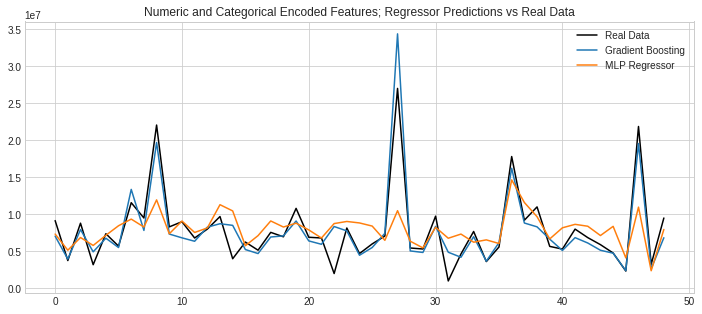

In [63]:
n=int(50); pylab.figure(figsize=(12,5)); pylab.plot(y_test_cat_enc[1:n],color='black',label='Real Data')
pylab.plot(y_test_cat_enc_gbr[1:n],label='Gradient Boosting'); pylab.plot(y_test_cat_enc_mlp[1:n],label='MLP Regressor')
pylab.legend(); pylab.title("Numeric and Categorical Encoded Features; Regressor Predictions vs Real Data"); pylab.show()